In [10]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import product
from Bio import SeqIO

def count_kmers(fasta_file, k):
    # initialize empty list to store k-mers
    kmers = []
    # open fasta file and iterate over sequences
    with open(fasta_file) as f:
        for record in SeqIO.parse(f, "fasta"):
            # extract sequence and iterate over k-mers
            sequence = str(record.seq)
            for i in range(len(sequence)-k+1):
                kmer = sequence[i:i+k]
                k_dic = generate_all_kmers(k)
                kmers.append(k_dic[kmer])
    # count frequency of each k-mer
    kmer_counts = Counter(kmers)
    return kmer_counts

def generate_all_kmers(k):
    alphabet = "ACGT"
    kmers = [''.join(p) for p in product(alphabet, repeat=k)]
    # print(kmers)
    idx = 0
    kmer_dict = {}
    for kmer in kmers:
        idx = idx + 1
        kmer_dict[kmer] = idx
    return kmer_dict
# example usage


{1: 681, 2: 376, 3: 752, 4: 542, 5: 577, 6: 452, 7: 222, 8: 568, 9: 611, 10: 685, 11: 962, 12: 477, 13: 327, 14: 431, 15: 693, 16: 438, 17: 554, 18: 664, 19: 907, 20: 604, 21: 745, 22: 705, 23: 303, 24: 827, 25: 192, 26: 215, 27: 323, 28: 217, 29: 352, 30: 739, 31: 883, 32: 739, 33: 649, 34: 428, 35: 718, 36: 416, 37: 721, 38: 739, 39: 257, 40: 679, 41: 783, 42: 809, 43: 827, 44: 584, 45: 419, 46: 425, 47: 731, 48: 434, 49: 456, 50: 346, 51: 361, 52: 327, 53: 698, 54: 690, 55: 158, 56: 638, 57: 626, 58: 675, 59: 890, 60: 743, 61: 382, 62: 601, 63: 629, 64: 929}


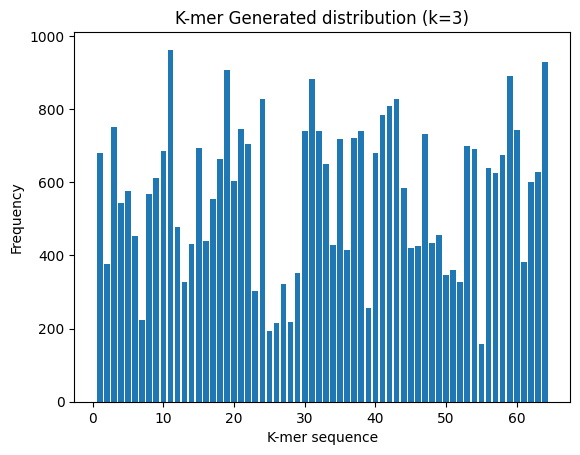

In [11]:
fasta_file_gen = 'gen.fa'
k = 3
kmer_counts_gen = count_kmers(fasta_file_gen, k)
kmer_counts_gen = dict(sorted(kmer_counts_gen.items()))
print(kmer_counts_gen)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_gen.keys(), kmer_counts_gen.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Generated distribution (k={})'.format(k))
# plt.show()
plt.savefig('gen_kmer_dis.png')



{1: 743, 2: 461, 3: 661, 4: 559, 5: 674, 6: 474, 7: 213, 8: 581, 9: 632, 10: 629, 11: 812, 12: 492, 13: 405, 14: 435, 15: 678, 16: 514, 17: 599, 18: 685, 19: 888, 20: 632, 21: 806, 22: 795, 23: 291, 24: 828, 25: 173, 26: 230, 27: 276, 28: 202, 29: 367, 30: 754, 31: 917, 32: 747, 33: 629, 34: 423, 35: 642, 36: 445, 37: 630, 38: 767, 39: 220, 40: 648, 41: 702, 42: 745, 43: 740, 44: 501, 45: 398, 46: 449, 47: 671, 48: 441, 49: 447, 50: 377, 51: 385, 52: 394, 53: 706, 54: 695, 55: 157, 56: 721, 57: 620, 58: 654, 59: 861, 60: 755, 61: 437, 62: 640, 63: 627, 64: 851}


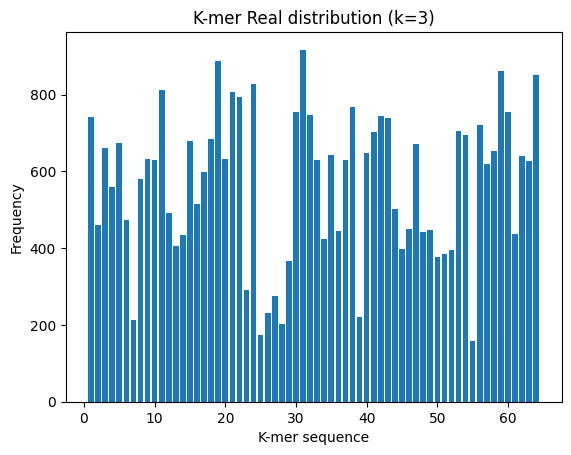

In [12]:
fasta_file_real = 'real.fa'
k = 3
kmer_counts_real = count_kmers(fasta_file_real, k)
kmer_counts_real = dict(sorted(kmer_counts_real.items()))
print(kmer_counts_real)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_real.keys(), kmer_counts_real.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Real distribution (k={})'.format(k))
# plt.show()
plt.savefig('real_kmer_dis.png')



{1: -62, 2: -85, 3: 91, 4: -17, 5: -97, 6: -22, 7: 9, 8: -13, 9: -21, 10: 56, 11: 150, 12: -15, 13: -78, 14: -4, 15: 15, 16: -76, 17: -45, 18: -21, 19: 19, 20: -28, 21: -61, 22: -90, 23: 12, 24: -1, 25: 19, 26: -15, 27: 47, 28: 15, 29: -15, 30: -15, 31: -34, 32: -8, 33: 20, 34: 5, 35: 76, 36: -29, 37: 91, 38: -28, 39: 37, 40: 31, 41: 81, 42: 64, 43: 87, 44: 83, 45: 21, 46: -24, 47: 60, 48: -7, 49: 9, 50: -31, 51: -24, 52: -67, 53: -8, 54: -5, 55: 1, 56: -83, 57: 6, 58: 21, 59: 29, 60: -12, 61: -55, 62: -39, 63: 2, 64: 78}


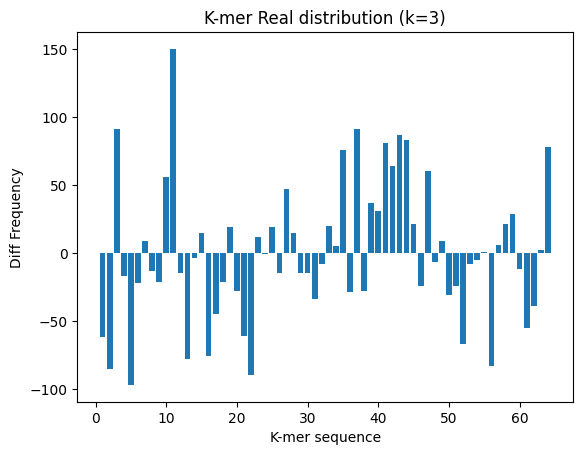

In [13]:
diff = {k: kmer_counts_gen[k] - kmer_counts_real[k] for k in kmer_counts_gen}
print(diff)
plt.bar(diff.keys(), diff.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Diff Frequency')
plt.title('K-mer Real distribution (k={})'.format(k))
# plt.show()
plt.savefig('diff.png')

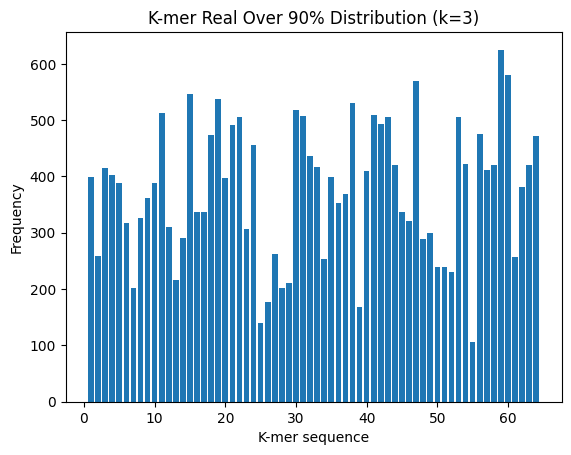

In [6]:
fasta_file_real = 'real_over90.fa'
k = 3
kmer_counts_90_real = count_kmers(fasta_file_real, k)
kmer_counts_90_real = dict(sorted(kmer_counts_90_real.items()))
# print(kmer_counts_real)
# create bar chart of k-mer frequency
plt.bar(kmer_counts_90_real.keys(), kmer_counts_90_real.values())
plt.xlabel('K-mer sequence')
plt.ylabel('Frequency')
plt.title('K-mer Real Over 90% Distribution (k={})'.format(k))
# plt.show()
plt.savefig('real_90%_kmer_dis.png')